#### Татур А.А.

#### ver 0.1

#### 09.10.2022

## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого:

1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность
7. Пробуем написать вывод по полученным результатам. 

###### Импорт библиотек

In [384]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import normaltest
from scipy.stats import pearsonr 

##### Импортируем данные

In [298]:
#https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
datas=pd.read_excel('Real estate valuation data set.xlsx', index_col=0)

In [299]:
datas.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### Нормализуем все данные и скалируем. Как сделать диапазон -1:1 не понял от слова совсем. Здесь выполнено z-преобразование

In [300]:
temp = preprocessing.StandardScaler().fit_transform(datas)
tr_pd=pd.DataFrame(temp, columns=datas.columns)
tr_pd.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


### Поиск пропусков

In [301]:
datas.describe(include = "all")
# Если бы они были, можно было бы просто выбросить эти строки data_wona=data.dropna()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Обрабатываем выбросы

1. Строим бокс-плот для каждой колонки, оцениваем наличие выбросов. По графикам видно, что колонки "X3 distance to the nearest MRT station", "X5 latitude", "X6 longitude", "Y house price of unit area" Содержат выбросы.

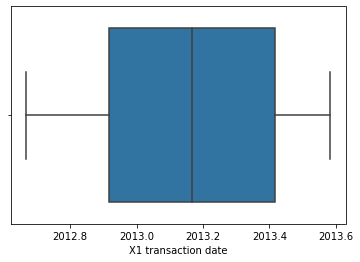

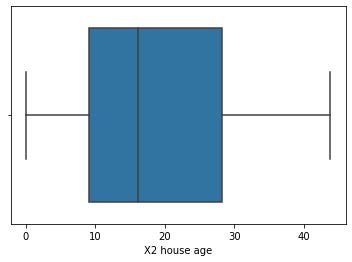

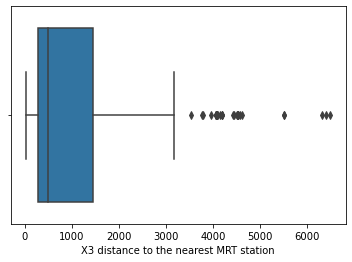

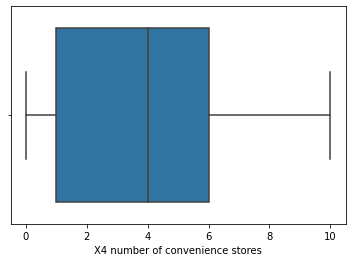

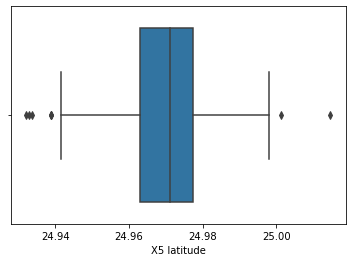

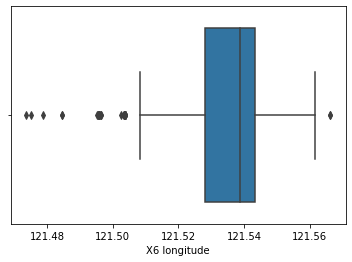

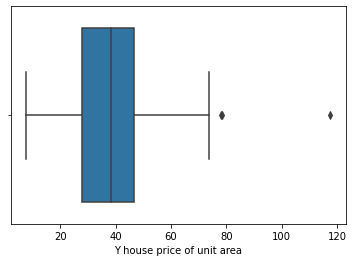

In [302]:
for col in datas.columns:
    plt.figure()
    sns.boxplot(x=datas[col])

##### Удаляем выбросы. Определеяем доверительный интервал (1.5 квартиля от медианы) и включаем значение в новый датасет только значение между этими границами для каждого столбца. 

In [303]:
lower_bound = datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=datas[(datas["X3 distance to the nearest MRT station"] > lower_bound) & (datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [304]:
lower_bound = new_datas["X5 latitude"].quantile(q=0.025)
upper_bound = new_datas["X5 latitude"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X5 latitude"] > lower_bound) & (new_datas["X5 latitude"] < upper_bound)]

In [305]:
lower_bound = new_datas["X6 longitude"].quantile(q=0.025)
upper_bound = new_datas["X6 longitude"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X6 longitude"] > lower_bound) & (new_datas["X6 longitude"] < upper_bound)]

In [306]:
lower_bound = new_datas["Y house price of unit area"].quantile(q=0.025)
upper_bound = new_datas["Y house price of unit area"].quantile(q=0.975)
new_datas=new_datas[(new_datas["Y house price of unit area"] > lower_bound) & (new_datas["Y house price of unit area"] < upper_bound)]

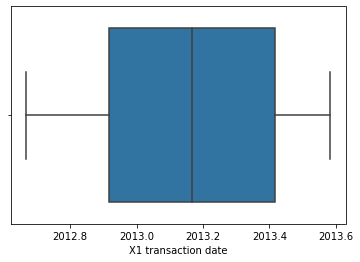

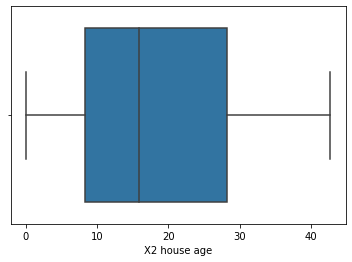

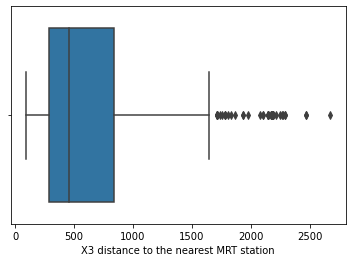

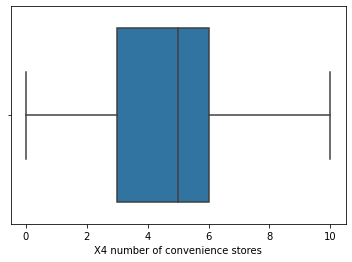

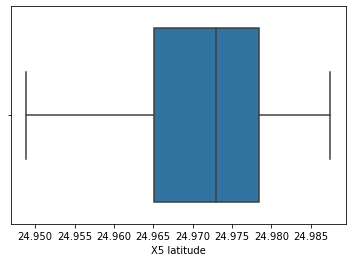

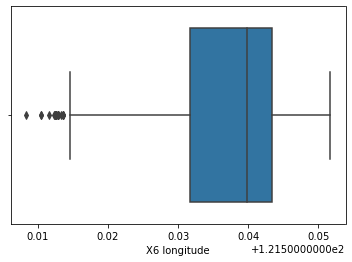

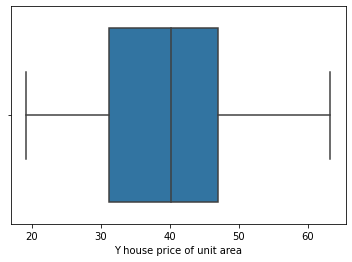

In [307]:
for col in new_datas.columns:
    plt.figure()
    sns.boxplot(x=new_datas[col])

##### При появлении новых выбросов, после удаления предыдущих, повторяем несколько раз для максимальной очистки

In [308]:
    lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
    upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
    new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [309]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [310]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [311]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [312]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [315]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

In [316]:
lower_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.025)
upper_bound = new_datas["X3 distance to the nearest MRT station"].quantile(q=0.975)
new_datas=new_datas[(new_datas["X3 distance to the nearest MRT station"] > lower_bound) & (new_datas["X3 distance to the nearest MRT station"] < upper_bound)]

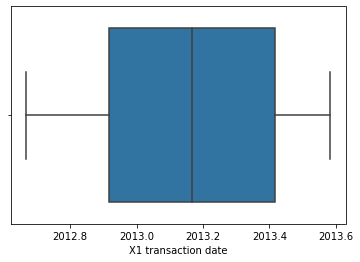

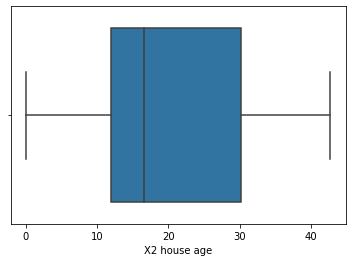

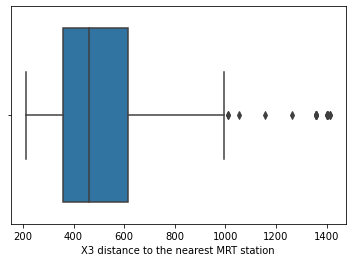

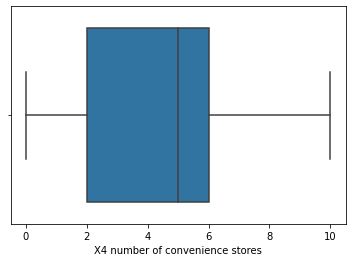

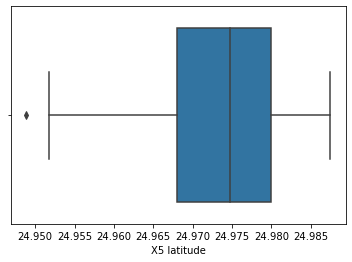

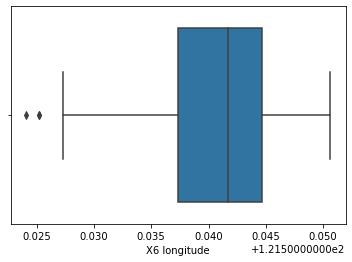

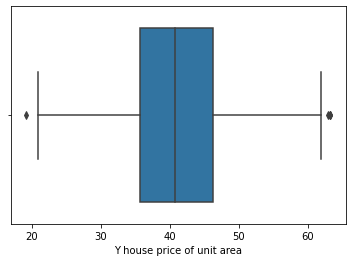

In [324]:
for col in new_datas.columns:
    plt.figure()
    sns.boxplot(x=new_datas[col])

#### Строим корелляционную матрицу

<AxesSubplot:>

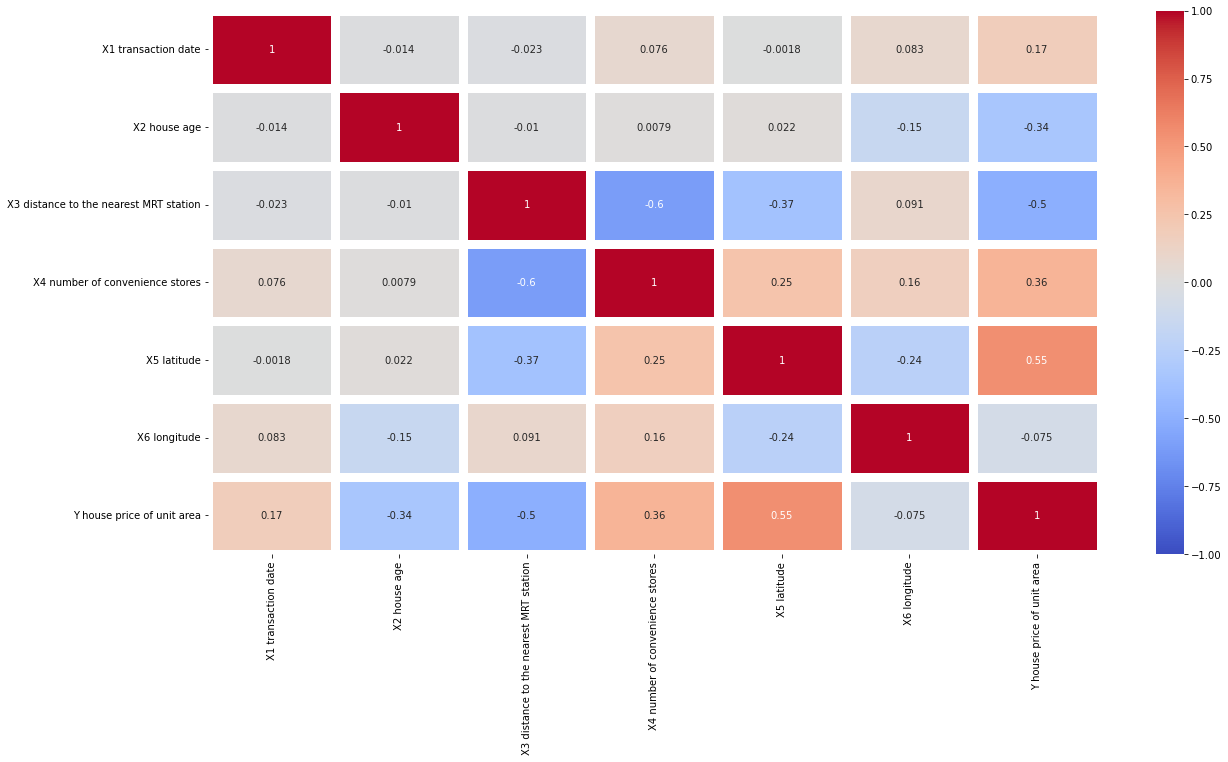

In [334]:
plt.figure(figsize=(20,10))
sns.heatmap(new_datas.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=9, linecolor='white', cbar_kws= {'orientation': 'vertical'})

##### Строим гистрограммы распределения

<Figure size 2160x720 with 0 Axes>

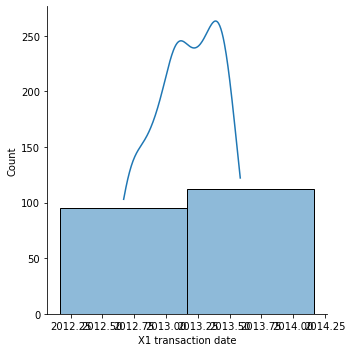

<Figure size 2160x720 with 0 Axes>

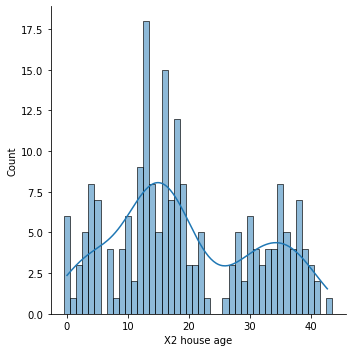

<Figure size 2160x720 with 0 Axes>

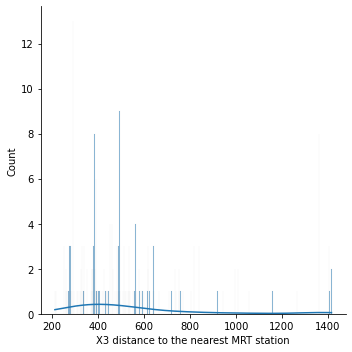

<Figure size 2160x720 with 0 Axes>

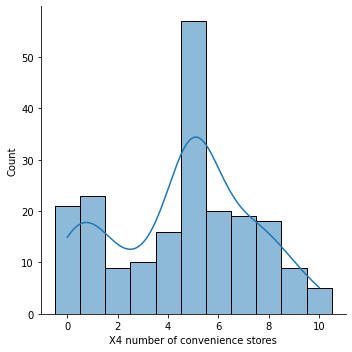

<Figure size 2160x720 with 0 Axes>

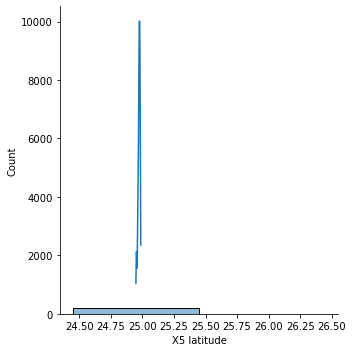

<Figure size 2160x720 with 0 Axes>

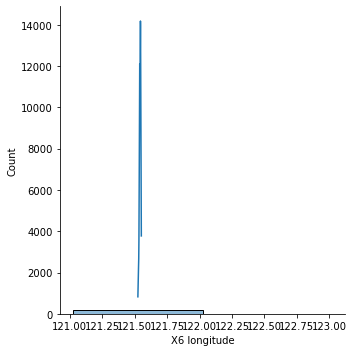

<Figure size 2160x720 with 0 Axes>

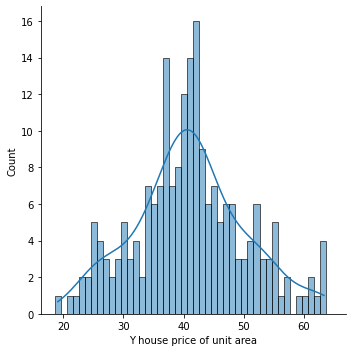

In [346]:
for col in new_datas.columns:
    plt.figure(figsize=(30,10))
    sns.displot(x=new_datas[col], discrete = True, kde = True)

##### Тест на нормальность

In [350]:
for col in new_datas.columns:
    print (col, ':')
    print(normaltest(new_datas[col]),'\n')

X1 transaction date :
NormaltestResult(statistic=38.92369399706575, pvalue=3.5304270409917203e-09) 

X2 house age :
NormaltestResult(statistic=36.57855999001947, pvalue=1.1404247137464626e-08) 

X3 distance to the nearest MRT station :
NormaltestResult(statistic=71.1149518951261, pvalue=3.610641799512803e-16) 

X4 number of convenience stores :
NormaltestResult(statistic=16.099681873866732, pvalue=0.00031915268384858454) 

X5 latitude :
NormaltestResult(statistic=20.388165819386128, pvalue=3.739091080465423e-05) 

X6 longitude :
NormaltestResult(statistic=10.725608859327316, pvalue=0.004687741215684076) 

Y house price of unit area :
NormaltestResult(statistic=0.8510580820608833, pvalue=0.6534240055629046) 



### Ищем (взоимозависимые данные).

In [394]:
features = ['X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'X1 transaction date']
y=new_datas['Y house price of unit area']
for data in features:
    r,p = pearsonr(new_datas[data], y)
    print("Коэффициент корелляции между {} и {} составил - ".format(data, 'Y house price of unit area'), r, "значимость - ", p)

Коэффициент корелляции между X2 house age и Y house price of unit area составил -  -0.3371426296451015 значимость -  6.783247577421912e-07
Коэффициент корелляции между X3 distance to the nearest MRT station и Y house price of unit area составил -  -0.5004368992977841 значимость -  1.614149967478507e-14
Коэффициент корелляции между X4 number of convenience stores и Y house price of unit area составил -  0.35544779489583345 значимость -  1.4747921085181248e-07
Коэффициент корелляции между X5 latitude и Y house price of unit area составил -  0.5474348088636758 значимость -  1.3964097206859677e-17
Коэффициент корелляции между X6 longitude и Y house price of unit area составил -  -0.07483693078104053 значимость -  0.2838550354741708
Коэффициент корелляции между X1 transaction date и Y house price of unit area составил -  0.17307180995249263 значимость -  0.012636963054738075


##### Выводы по полученным результатам. 

1. Параметры X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X5 latitude, X4 number of convenience stores, X6 longitude имеют нормальное распределение, тогда как Y house price of unit area не сооответствует ему.
2. Параметр "Y house price of unit area" (цена дома) имеет достоверную корелляцию с параметрами X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude
3. Корелляция между цеой дома  и параметрами X6 longitude, X1 transaction date недостоверна.
4. Корелляция между ценой дома и параметрами X2 house age, X3 distance to the nearest MRT station - имеют отрицательную корелляцию, что значит, что с увеличением возраста дома и удаленностит от MRT station цена на дом уменьшается. 
5. Корелляция между ценой дома и параметрами X4 number of convenience stores и X5 latitude имеет положительное значение, что значит, что с увеличением числа магазинов и географической широты цена на дом возрастает 